#Pre-requests

In [1]:
#Downloading the data from the google drive via gdown
!gdown "https://drive.google.com/u/2/uc?id=1oRQhKAWBcMcz-gJZ6HJ8M-9npQuHX5oJ"

Downloading...
From: https://drive.google.com/u/2/uc?id=1oRQhKAWBcMcz-gJZ6HJ8M-9npQuHX5oJ
To: /content/heart_failure_clinical_records_dataset.csv
100% 12.2k/12.2k [00:00<00:00, 8.60MB/s]


#1.Importing Libraries



In [ ]:
#Required System import and dependencies  setup for libaries
import six
import sys
import math
import itertools
sys.modules['sklearn.externals.six'] = six

#Visualization
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import plotly
import plotly.graph_objs as go
import pandas as pd
from pandas.plotting import parallel_coordinates
import seaborn as sns
sns.set(rc={'figure.figsize':(16,8)})

#preproccessing , feature selection and Scaleing 
import xgboost as xgb
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.decomposition import PCA
from sklearn import ensemble
from sklearn.feature_selection import RFECV


#Models (Classifiers)
from sklearn.model_selection import train_test_split, GridSearchCV , StratifiedKFold ,KFold ,train_test_split,cross_val_score
from sklearn.datasets import make_classification
from sklearn.svm import NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
from mlxtend.classifier import StackingCVClassifier
from sklearn.ensemble import VotingClassifier

#Metrics
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix as cf ,precision_recall_fscore_support as f1



import warnings
warnings.filterwarnings('ignore')


#2.EDA and Visualization

In [ ]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data = data.drop(['time'], axis=1)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


In [ ]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


In [ ]:
#Corrlation of data 
corr = data.corr()
corr

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


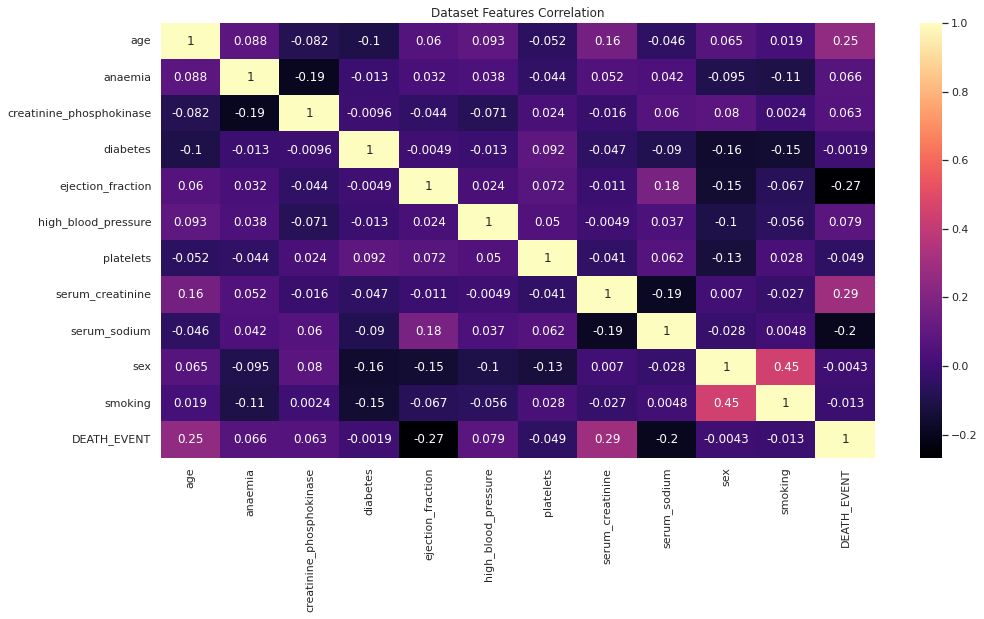

In [ ]:
plt.title("Dataset Features Correlation")
sns.heatmap(data.corr(),annot=True,cmap='magma');

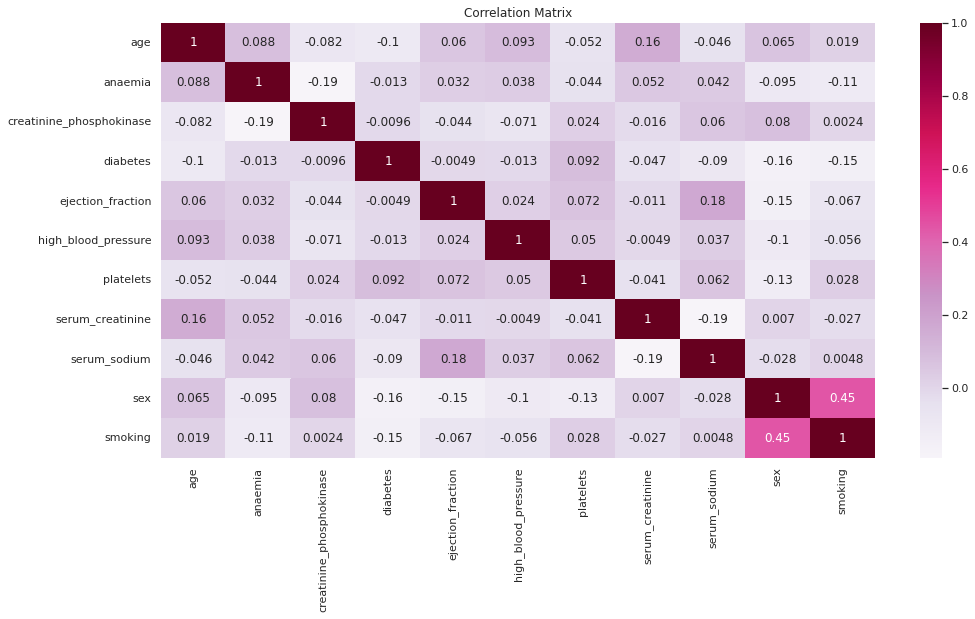

In [ ]:
#correlated features identification 
correlated_features = set()
correlation_matrix = data.drop('DEATH_EVENT', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
            
correlated_features


#Correlation Matrix
plt.title("Correlation Matrix")
sns.heatmap(correlation_matrix,annot=True,cmap="PuRd");

### Dimensionality reduction using RFECV(Recursive feature elimination with cross-validation to select the number of features)

In [ ]:
X = data.drop('DEATH_EVENT', axis=1) #Features
target = data['DEATH_EVENT']         #Labels

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=101), scoring='accuracy')

In [ ]:
rfecv.grid_scores_

array([[0.56666667, 0.63333333, 0.46666667, 0.63333333, 0.7       ,
        0.63333333, 0.46666667, 0.53333333, 0.63333333, 0.55172414],
       [0.7       , 0.73333333, 0.63333333, 0.63333333, 0.7       ,
        0.66666667, 0.5       , 0.8       , 0.63333333, 0.62068966],
       [0.7       , 0.56666667, 0.63333333, 0.63333333, 0.76666667,
        0.63333333, 0.6       , 0.8       , 0.73333333, 0.5862069 ],
       [0.73333333, 0.6       , 0.7       , 0.66666667, 0.7       ,
        0.76666667, 0.7       , 0.83333333, 0.76666667, 0.75862069],
       [0.7       , 0.63333333, 0.73333333, 0.73333333, 0.7       ,
        0.83333333, 0.63333333, 0.83333333, 0.76666667, 0.79310345],
       [0.83333333, 0.66666667, 0.76666667, 0.66666667, 0.7       ,
        0.83333333, 0.7       , 0.86666667, 0.8       , 0.79310345],
       [0.73333333, 0.63333333, 0.76666667, 0.63333333, 0.66666667,
        0.8       , 0.76666667, 0.86666667, 0.76666667, 0.79310345],
       [0.83333333, 0.7       , 0.7333333

Optimal number of features: 6


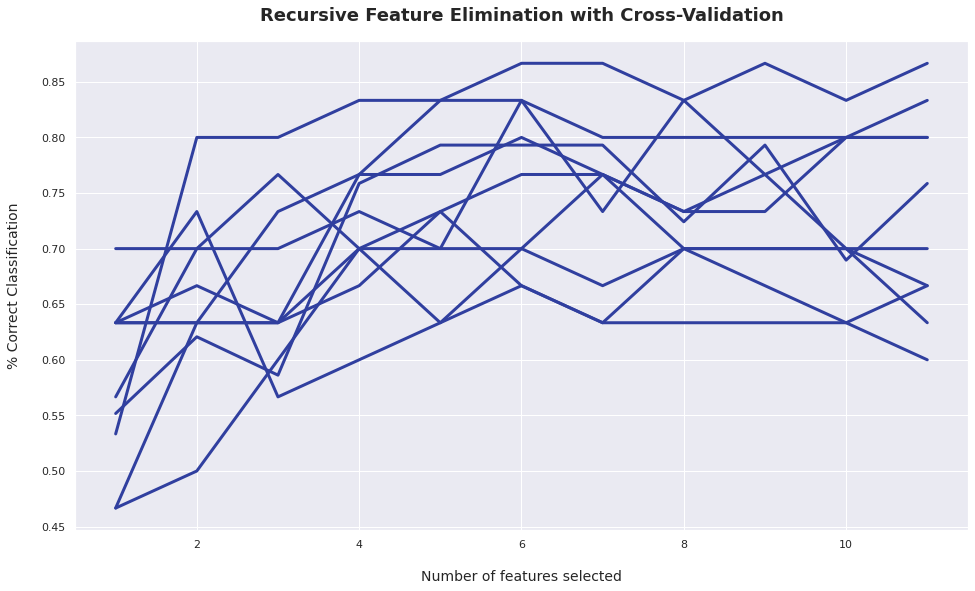

In [ ]:
print(f'Optimal number of features: {rfecv.n_features_}')
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
plt.show()

In [ ]:
#Dropping spots where it is not supported by rfecv
print(np.where(rfecv.support_ == False)[0])
X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[ 1  3  5  9 10]


In [ ]:
rfecv.estimator_.feature_importances_

array([0.16105185, 0.15512285, 0.19164005, 0.15285816, 0.22456517,
       0.11476192])

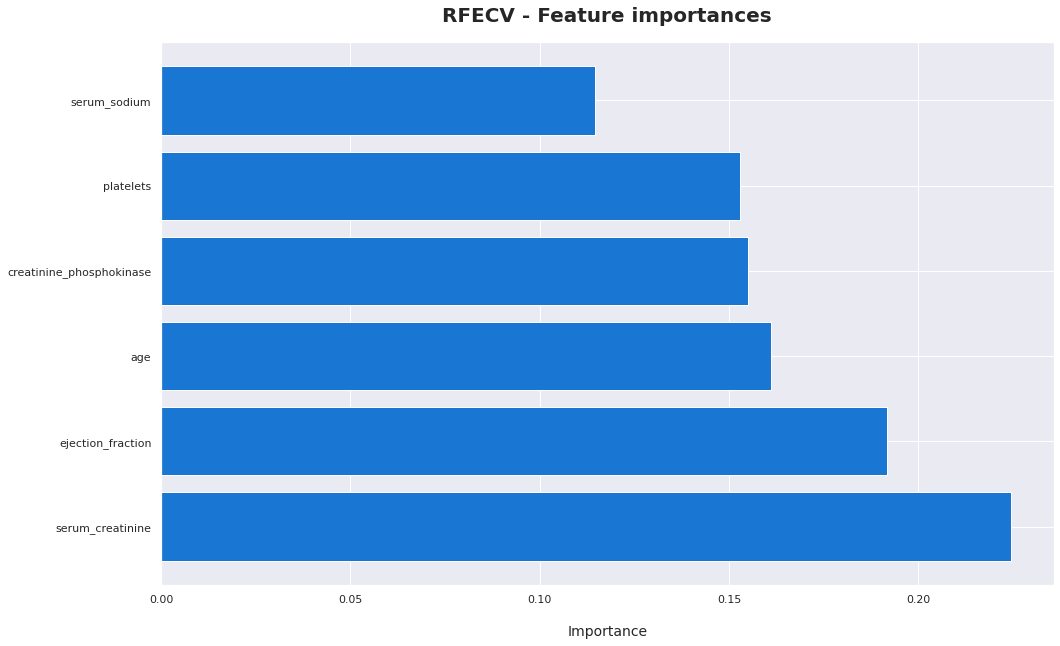

In [ ]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(16, 10))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [ ]:
y = target
print("Features :", *X.columns,sep='\n')
print("\nFeatures Shape:",X.shape,"\nLabels   Shape:", y.shape)

Features :
age
creatinine_phosphokinase
ejection_fraction
platelets
serum_creatinine
serum_sodium

Features Shape: (299, 6) 
Labels   Shape: (299,)


Text(0.5, 0.98, 'Features')

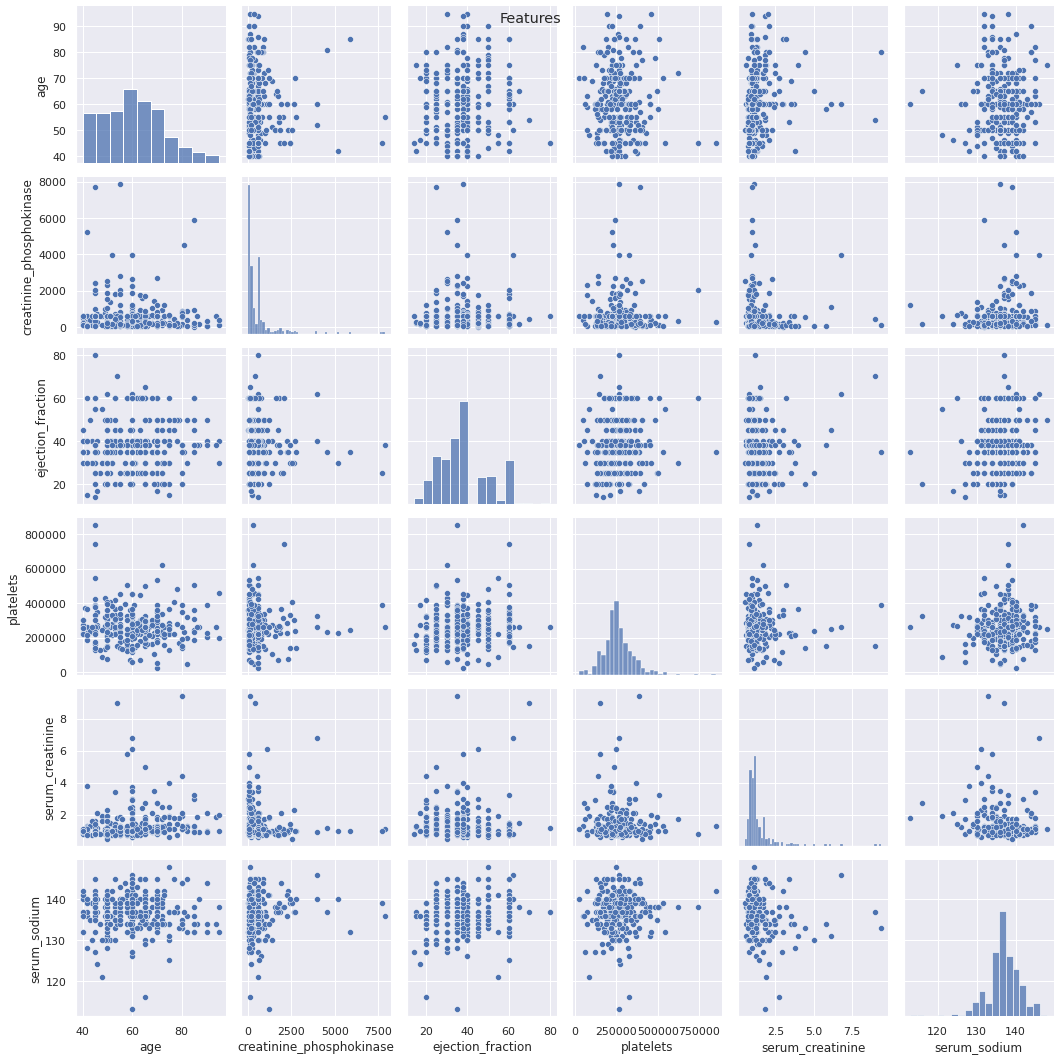

In [ ]:
#Features Visualization
g = sns.pairplot(X)
g.fig.suptitle("Features")

#3.Data Preparation

In [ ]:
#Some useful functions
def Id_data(data):
  print("Type :",type(data))
  print(f"Shape:",data.shape,"\n")

def is_nan(num):
    '''
    Returns the value if it is not equal to itself or nan
    '''
    return num != num

###TrainTest split method

In [ ]:
Id_data(X)
Id_data(y)

Type : <class 'pandas.core.frame.DataFrame'>
Shape: (299, 6) 

Type : <class 'pandas.core.series.Series'>
Shape: (299,) 



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
Id_data(X_train)
Id_data(y_train)
Id_data(X_test)
Id_data(y_test)

Type : <class 'pandas.core.frame.DataFrame'>
Shape: (224, 6) 

Type : <class 'pandas.core.series.Series'>
Shape: (224,) 

Type : <class 'pandas.core.frame.DataFrame'>
Shape: (75, 6) 

Type : <class 'pandas.core.series.Series'>
Shape: (75,) 



Total training samples: 224
Total   test   samples: 75


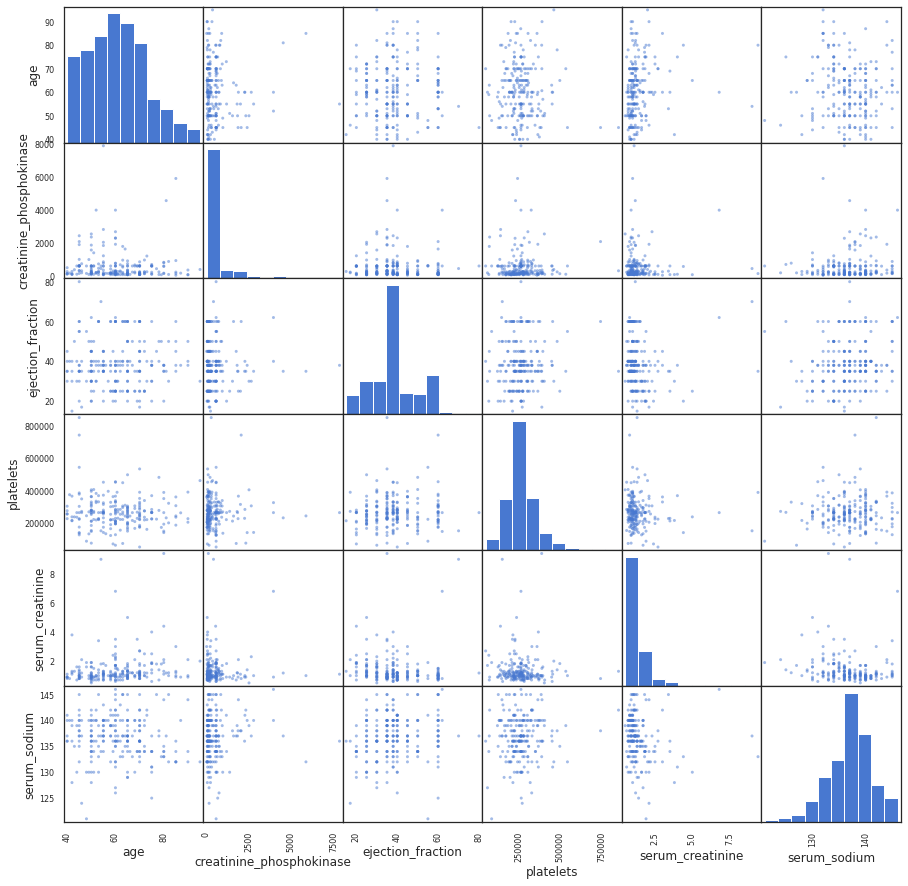

In [ ]:
#Pair Plot of the Features
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
#from ensemble import ensemble
from sklearn.metrics import accuracy_score

%matplotlib inline

# load data 
print(f"Total training samples: {len(X_train)}")
print(f"Total   test   samples: {len(X_test)}")

# helper funcs
sns.set(style="white", palette="muted", color_codes=True)
# This pair plot gives visibility of the features that would Support survival rate.
pd.plotting.scatter_matrix(X_train,figsize=(15,15));

###Scaling the Data

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#4.Train and Classification

###Initializing classifier models

In [ ]:
#Support Vector 
classifier1 = SVC(C = 50, degree = 1, gamma = "auto", kernel = "rbf", probability = True)

# Nu Support Vector 
classifier2 = NuSVC(degree = 1, kernel = "rbf", nu = 0.25, probability = True)

#Multi-layer perceptron (ANN) 
classifier3 = MLPClassifier(activation = "relu", alpha = 0.1, hidden_layer_sizes = (10,10,10),
                            learning_rate = "constant", max_iter = 2000, random_state = 1000)

#Random Forest 
classifier4 = RandomForestClassifier(n_estimators = 500, criterion = "gini", max_depth = 10,
                                     max_features = "auto", min_samples_leaf = 0.005,
                                     min_samples_split = 0.005, n_jobs = -1, random_state = 1000)

#KNN 
classifier5 = knn(n_neighbors=3)

#DecisionTree
classifier6 = DecisionTreeClassifier(random_state=1000)

#for XGBoost classifier
classifier7 = xgb.XGBClassifier()

###Train and Classification with StackingCV classifier 

In [ ]:
# Initializing the StackingCV classifier
sclf = StackingCVClassifier(classifiers = [classifier1, classifier2, classifier3, classifier4, classifier5, classifier6,classifier7],
                            shuffle = False,
                            use_probas = True,
                            cv = 5,
                            meta_classifier = SVC(probability = True))
# Id_data(X_train)
# Id_data(y_train.values)

In [ ]:
# Create Dictionary to store classifiers
classifiers = {"SVC": classifier1,
               "MLP": classifier2,
               "NuSVC": classifier3,
               "RF": classifier4,
               "knn": classifier5,
               "DCT": classifier6,
               "xgb": classifier7,
               "Stack": sclf}
#Since Models take in nparrays and not pandas series,We Set  Y Values as labels 
#y_train=y_train.values

In [ ]:
# Train classifiers
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    print(f"Fitting the {key} Model")

    #sclf takes in only np.array so :
    if key =="Stack":
      classifier.fit(X_train, y_train.values)
    else:
      classifier.fit(X_train, y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier

Fitting the SVC Model
Fitting the MLP Model
Fitting the NuSVC Model
Fitting the RF Model
Fitting the knn Model
Fitting the DCT Model
Fitting the xgb Model
Fitting the Stack Model


#5.Making predictions 

Model :  SVC
Accuracy: 0.7866666666666666
Confusion Matrix :
 [[49 12]
 [ 4 10]]
F1 Score:
 (array([0.80327869, 0.71428571]), array([0.9245283 , 0.45454545]), array([0.85964912, 0.55555556]), array([53, 22]))


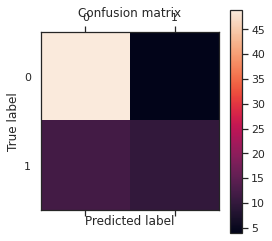












Model :  MLP
Accuracy: 0.7866666666666666
Confusion Matrix :
 [[49 12]
 [ 4 10]]
F1 Score:
 (array([0.80327869, 0.71428571]), array([0.9245283 , 0.45454545]), array([0.85964912, 0.55555556]), array([53, 22]))


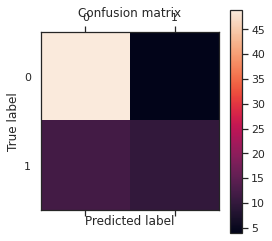












Model :  NuSVC
Accuracy: 0.7733333333333333
Confusion Matrix :
 [[42  6]
 [11 16]]
F1 Score:
 (array([0.875     , 0.59259259]), array([0.79245283, 0.72727273]), array([0.83168317, 0.65306122]), array([53, 22]))


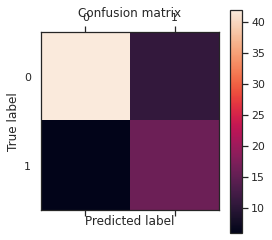












Model :  RF
Accuracy: 0.7733333333333333
Confusion Matrix :
 [[42  6]
 [11 16]]
F1 Score:
 (array([0.875     , 0.59259259]), array([0.79245283, 0.72727273]), array([0.83168317, 0.65306122]), array([53, 22]))


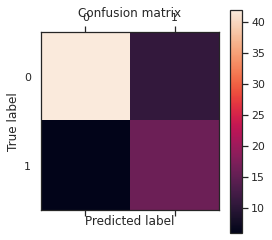












Model :  knn
Accuracy: 0.7066666666666667
Confusion Matrix :
 [[42 11]
 [11 11]]
F1 Score:
 (array([0.79245283, 0.5       ]), array([0.79245283, 0.5       ]), array([0.79245283, 0.5       ]), array([53, 22]))


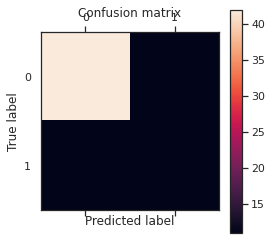












Model :  DCT
Accuracy: 0.7333333333333333
Confusion Matrix :
 [[41  8]
 [12 14]]
F1 Score:
 (array([0.83673469, 0.53846154]), array([0.77358491, 0.63636364]), array([0.80392157, 0.58333333]), array([53, 22]))


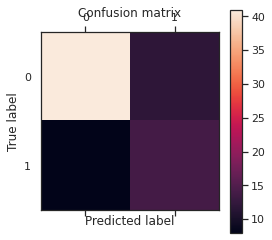












Model :  xgb
Accuracy: 0.6933333333333334
Confusion Matrix :
 [[39  9]
 [14 13]]
F1 Score:
 (array([0.8125    , 0.48148148]), array([0.73584906, 0.59090909]), array([0.77227723, 0.53061224]), array([53, 22]))


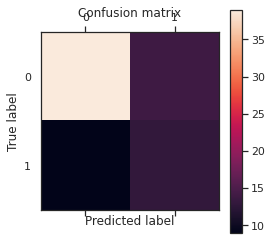












Model :  Stack
Accuracy: 0.7466666666666667
Confusion Matrix :
 [[43  9]
 [10 13]]
F1 Score:
 (array([0.82692308, 0.56521739]), array([0.81132075, 0.59090909]), array([0.81904762, 0.57777778]), array([53, 22]))


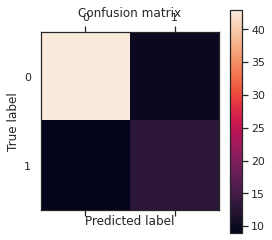

In [ ]:
# Get results
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict_proba(X_test)[:,1]
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred
## run confusion matrix here
    threshold = 0.50
    y_pred1 = (classifiers[key].predict_proba(X_test)[:, 1] > threshold).astype('float')
    print("Model : " ,key)
    print ('Accuracy:', accuracy_score(y_test, y_pred1))
    print ("Confusion Matrix :\n",cf(y_pred1,y_test))
    print ("F1 Score:\n", f1(y_test, y_pred1))
    plt.figure(figsize=(16,8))
    plt.matshow(cf(y_test, y_pred1))
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    print("\n"*10)
# Add the test set to the results object
results["Target"] = y_test



In [ ]:
y_pred

array([0.20629255, 0.15492261, 0.64633103, 0.15397708, 0.19498641,
       0.29759645, 0.35871734, 0.24176334, 0.21041418, 0.57822333,
       0.71801334, 0.32210083, 0.7093138 , 0.74086594, 0.17862287,
       0.36935021, 0.68114209, 0.66639518, 0.37743275, 0.17592927,
       0.59021209, 0.25154789, 0.25807435, 0.31797187, 0.22945367,
       0.20448697, 0.68866459, 0.64938292, 0.17190553, 0.62227694,
       0.76567102, 0.7207421 , 0.18007274, 0.42570618, 0.16843142,
       0.30742971, 0.19066052, 0.40678666, 0.33641258, 0.18421212,
       0.64266065, 0.41556672, 0.21793303, 0.1528175 , 0.72018939,
       0.57094469, 0.19919817, 0.18012041, 0.22846979, 0.48248388,
       0.31333062, 0.2080381 , 0.372924  , 0.22189948, 0.64964433,
       0.59674238, 0.2052002 , 0.18321981, 0.27805082, 0.66958407,
       0.16276805, 0.17065442, 0.67302304, 0.17816962, 0.61133953,
       0.17881272, 0.21014882, 0.64088828, 0.17924762, 0.16566994,
       0.3900622 , 0.36973069, 0.26463862, 0.38098862, 0.62541

#6.Tuning and Visualzing results  

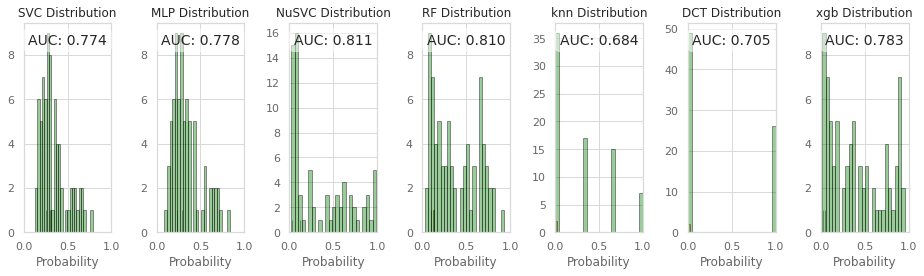

In [ ]:
# Probability Distributions Figure
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(13, 4), nrows=1, ncols = 7)

for key, counter in zip(classifiers, range(7)):
    # Get predictions
    y_pred = results[key]
    
    # Get AUC
    auc = metrics.roc_auc_score(y_test, y_pred)
    textstr = f"AUC: {auc:.3f}"

    # Plot false distribution
    false_pred = results[results["Target"] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False, 
                 bins=int(25), color = 'red',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    # Plot true distribution
    true_pred = results[results["Target"] == 1]
    sns.distplot(results[key], hist=True, kde=False, 
                 bins=int(25), color = 'green',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    
    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    # Place a text box in upper left in axes coords
    ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                    verticalalignment = "top", bbox=props)
    
    # Set axis limits and labels
    ax[counter].set_title(f"{key} Distribution")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Probability")

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("Probability Distribution for each Classifier.png", dpi = 1080)

###Tuning


In [ ]:
# Define parameter grid 
params = {"meta_classifier__kernel": ["linear", "rbf", "poly"],
          "meta_classifier__C": [1, 2],
          "meta_classifier__degree": [3, 4, 5],
          "meta_classifier__probability": [True]}


# Initialize GridSearchCV
grid = GridSearchCV(estimator = sclf, 
                    param_grid = params, 
                    cv = 5,
                    scoring = "roc_auc",
                    verbose = 10,
                    n_jobs = 1)

# Fit GridSearchCV
grid.fit(X_train, y_train.values)

# Making prediction on test set
y_pred = grid.predict_proba(X_test)[:,1]

# Getting AUC
auc = metrics.roc_auc_score(y_test, y_pred)

# Print results
print(f"The AUC of the tuned Stacking classifier is {auc:.3f}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START meta_classifier__C=1, meta_classifier__degree=3, meta_classifier__kernel=linear, meta_classifier__probability=True
[CV 1/5; 1/18] END meta_classifier__C=1, meta_classifier__degree=3, meta_classifier__kernel=linear, meta_classifier__probability=True;, score=nan total time=  15.0s
[CV 2/5; 1/18] START meta_classifier__C=1, meta_classifier__degree=3, meta_classifier__kernel=linear, meta_classifier__probability=True
[CV 2/5; 1/18] END meta_classifier__C=1, meta_classifier__degree=3, meta_classifier__kernel=linear, meta_classifier__probability=True;, score=nan total time=  14.1s
[CV 3/5; 1/18] START meta_classifier__C=1, meta_classifier__degree=3, meta_classifier__kernel=linear, meta_classifier__probability=True
[CV 3/5; 1/18] END meta_classifier__C=1, meta_classifier__degree=3, meta_classifier__kernel=linear, meta_classifier__probability=True;, score=nan total time=  13.7s
[CV 4/5; 1/18] START meta_classifier

#7.Stacking Different Combinations of Classifiers  for best Perforemance 

In [ ]:
# Classifier labels
classifier_labels = ["SVC", "MLP", "NuSVC", "RF", "DCT" , "knn", "xgb"]

# Get all unique combinations of classifier with a set size greater than or equal to 2
combo_classifiers = []
for ii in range(2, len(classifier_labels)+1):
    for subset in itertools.combinations(classifier_labels, ii):
        combo_classifiers.append(subset)

# Stack, tune, and evaluate stack of classifiers
for combo in combo_classifiers:
    # Get labels of classifier to create a stack
    labels = list(combo)
     
    # Get classifiers
    classifier_combo = []
    for ii in range(len(labels)):
        label = classifier_labels[ii]
        classifier = classifiers[label]
        classifier_combo.append(classifier)
         
    # Initializing the StackingCV classifier
    sclf = StackingCVClassifier(classifiers = classifier_combo,
                                shuffle = False,
                                use_probas = True,
                                cv = 5,
                                meta_classifier = SVC(probability = True))
    
    # Initialize GridSearchCV
    grid = GridSearchCV(estimator = sclf, 
                        param_grid = params, 
                        cv = 5,
                        scoring = "roc_auc",
                        verbose = 0,
                        n_jobs = 1)
    
    # Fit GridSearchCV
    grid.fit(X_train, y_train.values)
    
    # Making prediction on test set
    y_pred = grid.predict_proba(X_test)[:,1]
    
    # Getting AUC
    auc = metrics.roc_auc_score(y_test, y_pred)
    
    # Print results
    print(f"AUC of stack {combo}: {auc:.3f}")

AUC of stack ('SVC', 'MLP'): 0.773
AUC of stack ('SVC', 'NuSVC'): 0.227
AUC of stack ('SVC', 'RF'): 0.769
AUC of stack ('SVC', 'DCT'): 0.755
AUC of stack ('SVC', 'knn'): 0.226
AUC of stack ('SVC', 'xgb'): 0.227
AUC of stack ('MLP', 'NuSVC'): 0.768
AUC of stack ('MLP', 'RF'): 0.754
AUC of stack ('MLP', 'DCT'): 0.720
AUC of stack ('MLP', 'knn'): 0.317
AUC of stack ('MLP', 'xgb'): 0.278
AUC of stack ('NuSVC', 'RF'): 0.632
AUC of stack ('NuSVC', 'DCT'): 0.775
AUC of stack ('NuSVC', 'knn'): 0.231
AUC of stack ('NuSVC', 'xgb'): 0.392
AUC of stack ('RF', 'DCT'): 0.294
AUC of stack ('RF', 'knn'): 0.749
AUC of stack ('RF', 'xgb'): 0.774
AUC of stack ('DCT', 'knn'): 0.772
AUC of stack ('DCT', 'xgb'): 0.231
AUC of stack ('knn', 'xgb'): 0.771
AUC of stack ('SVC', 'MLP', 'NuSVC'): 0.772
AUC of stack ('SVC', 'MLP', 'RF'): 0.224
AUC of stack ('SVC', 'MLP', 'DCT'): 0.786
AUC of stack ('SVC', 'MLP', 'knn'): 0.786
AUC of stack ('SVC', 'MLP', 'xgb'): 0.744
